In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from numpy.random import seed

In [14]:
class AdalineSGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 10,
                 shuffle = True, random_state = None, verbose = False):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.verbose = verbose
        if random_state:
            seed(random_state)
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) > 0, 1, -1)
    

In [5]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
y = df.iloc[0:100, 4].values
y = np.where(y==1.0, -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [6]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:,1] = (X[:,1] - X[:, 1].mean()) / X[:, 1].std()

In [16]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
     # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max =X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha = 0.8, c = cmap(idx), marker = markers[idx],
                   label = cl)

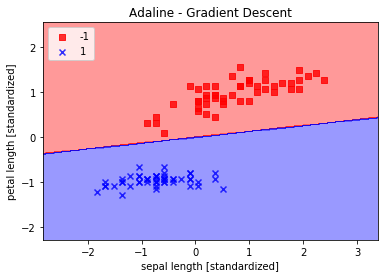

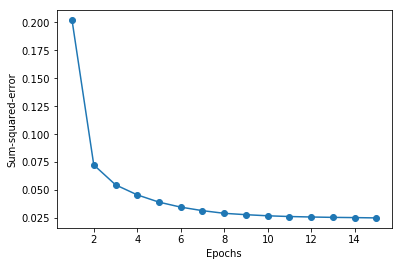

In [17]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state = 1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()